In [1]:
# data from FoodData Central: https://fdc.nal.usda.gov/
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load cleaned branded food df
branded_food = pd.read_csv('cleaned_branded_food.csv')

print('dataframe shape:', branded_food.shape)
branded_food.head()

dataframe shape: (1202625, 8)


,fdc_id,brand_owner,brand_name,ingredients,branded_food_category,description,category,subcategory
0,1105906,CAMPBELL SOUP COMPANY,NaN,"clam stock, potatoes, clams, cream, vegetable ...",Prepared Soups,CAMPBELL'S SLOW KETTLE SOUP CLAM CHOWDER,PREPARED FOODS/MEALS,"SOUP, STEW"
1,1105907,CAMPBELL SOUP COMPANY,NaN,"water, cream, broccoli, celery, vegetable oil ...",Prepared Soups,CAMPBELL'S SLOW KETTLE SOUP CHEESE BROCCOLI,PREPARED FOODS/MEALS,"SOUP, STEW"
2,1105909,CAMPBELL SOUP COMPANY,NaN,"water, pea beans, carrots, cooked ham - water ...",Prepared Soups,CAMPBELL'S SOUP BEAN AND HAM,PREPARED FOODS/MEALS,"SOUP, STEW"
3,1105912,CAMPBELL SOUP COMPANY,NaN,"tomato puree (water, tomato paste), water, hig...",Prepared Soups,CAMPBELL'S SOUP TOMATO,PREPARED FOODS/MEALS,"SOUP, STEW"
4,1105913,CAMPBELL SOUP COMPANY,NaN,"water, tomato puree (water, tomato paste), chi...",Dough Based Products / Meals,CAMPBELL'S PASTA SPAGHETTIOS W FRANKS,PREPARED FOODS/MEALS,DINNER


In [3]:
# load cleaned food nutrient df
food_nutrients = pd.read_csv('cleaned_food_nutrients.csv')

print('dataframe shape:', food_nutrients.shape)
food_nutrients.head()

dataframe shape: (255717, 15)


,fdc_id,"Calcium, Ca (MG)",Cholesterol (MG),Energy (KCAL),"Fatty acids, total saturated (G)","Fatty acids, total trans (G)","Fiber, total dietary (G)","Iron, Fe (MG)",Protein (G),"Sodium, Na (MG)","Sugars, added (G)","Fat, total (G)","Sugars, total (G)","Carbohydrate, total (G)",Vitamin D (UG)
0,356671,36.0,71.0,464.0,8.93,0.0,3.6,1.79,10.71,250.0,21.4,17.86,21.43,64.29,NaN
1,356672,71.0,0.0,464.0,7.14,0.0,3.6,2.14,10.71,286.0,21.4,16.07,21.43,64.29,NaN
2,356675,91.0,45.0,485.0,7.58,0.0,3.0,2.12,6.06,242.0,27.3,24.24,27.27,60.61,NaN
3,356689,18.0,45.0,250.0,1.79,0.0,0.0,1.07,10.71,286.0,1.8,16.07,1.79,17.86,NaN
4,356803,3.0,0.0,71.0,0.00,0.0,0.9,0.00,0.00,0.0,4.4,0.00,13.27,16.81,NaN


In [4]:
# join branded food and nutrition info dataframes, keep items present in both tables
brand_food_nutrients = branded_food.join(food_nutrients.set_index('fdc_id'), on='fdc_id', how='inner')

print('dataframe shape:', brand_food_nutrients.shape)
brand_food_nutrients.head()

dataframe shape: (255717, 22)


,fdc_id,brand_owner,brand_name,ingredients,branded_food_category,description,category,subcategory,"Calcium, Ca (MG)",Cholesterol (MG),...,"Fatty acids, total trans (G)","Fiber, total dietary (G)","Iron, Fe (MG)",Protein (G),"Sodium, Na (MG)","Sugars, added (G)","Fat, total (G)","Sugars, total (G)","Carbohydrate, total (G)",Vitamin D (UG)
155,1106095,"DOLE PACKAGED FOODS, LLC",NaN,"pineapple, water, sugar, and citric acid.",Canned Fruit,PINEAPPLE CHUNKS IN HEAVY SYRUP,"FRUITS, VEGETABLES, LEGUMES","PREPARED FRUITS, VEGETABLES",0.0,0.0,...,0.0,0.9,0.15,0.43,0.0,11.5,0.00,20.09,20.94,NaN
164,1106106,MRS. FIELDS FAMOUS BRANDS LLC,NaN,"bleached wheat flour, sugar, raisins, oats, fr...",Cookies & Biscuits,"OATMEAL RAISIN WITH WALNUTS SOFTBAKED COOKIES,...",SNACKS,"COOKIES, CRACKERS",32.0,36.0,...,0.0,3.6,1.07,3.57,429.0,17.9,16.07,35.71,64.29,NaN
170,1106119,"NORTH AMERICAN BAKING, INC.",NaN,"enriched flour (wheat flour, niacin, reduced i...",Flavored Snack Crackers,"CHICKEN FLAVORED SNACK CRACKERS, CHICKEN",SNACKS,"COOKIES, CRACKERS",0.0,0.0,...,0.0,3.3,4.00,6.67,867.0,10.0,16.67,10.00,70.00,NaN
171,1106120,INTERBAKE FOODS INC.,NaN,"sugar, peanut butter (peanuts, palm oil, corn ...",Cookies & Biscuits,"FUDGE PEANUT BUTTER FILLED COOKIES, FUDGE PEAN...",SNACKS,"COOKIES, CRACKERS",0.0,0.0,...,0.0,3.8,3.08,7.69,346.0,30.8,30.77,30.77,57.69,NaN
172,1106121,INTERBAKE FOODS INC.,NaN,"enriched wheat flour (flour, niacin, reduced i...",Cookies & Biscuits,"ORIGINAL CHOCOLATE CHIP COOKIES, ORIGINAL CHOC...",SNACKS,"COOKIES, CRACKERS",0.0,0.0,...,0.0,3.0,3.33,3.03,242.0,30.3,27.27,30.30,66.67,NaN


In [5]:
brand_food_nutrients['category'].value_counts()

category
SNACKS                                      86661
EGGS, DAIRY, DAIRY SUBSTITUTES              55543
PREPARED FOODS/MEALS                        43060
FRUITS, VEGETABLES, LEGUMES                 22134
MEAT, POULTRY, SEAFOOD, MEAT SUBSTITUTES    17595
CEREAL                                      16120
DRINKS (NON-DAIRY)                          14604
Name: count, dtype: int64

In [6]:
# look for duplicate rows
duplicates = brand_food_nutrients.duplicated(subset=['brand_owner', 'brand_name', 'ingredients', 
                                                    'description', 'Calcium, Ca (MG)', 'Cholesterol (MG)',
                                                    'Energy (KCAL)', 'Fatty acids, total saturated (G)',
                                                    'Fatty acids, total trans (G)', 'Fiber, total dietary (G)', 
                                                    'Iron, Fe (MG)', 'Protein (G)', 'Sodium, Na (MG)', 'Sugars, added (G)',
                                                    'Fat, total (G)', 'Sugars, total (G)', 'Carbohydrate, total (G)', 
                                                    'Vitamin D (UG)'], keep='last')
brand_food_nutrients[duplicates]

,fdc_id,brand_owner,brand_name,ingredients,branded_food_category,description,category,subcategory,"Calcium, Ca (MG)",Cholesterol (MG),...,"Fatty acids, total trans (G)","Fiber, total dietary (G)","Iron, Fe (MG)",Protein (G),"Sodium, Na (MG)","Sugars, added (G)","Fat, total (G)","Sugars, total (G)","Carbohydrate, total (G)",Vitamin D (UG)
155,1106095,"DOLE PACKAGED FOODS, LLC",NaN,"pineapple, water, sugar, and citric acid.",Canned Fruit,PINEAPPLE CHUNKS IN HEAVY SYRUP,"FRUITS, VEGETABLES, LEGUMES","PREPARED FRUITS, VEGETABLES",0.0,0.0,...,0.0,0.9,0.15,0.43,0.0,11.5,0.00,20.09,20.94,NaN
170,1106119,"NORTH AMERICAN BAKING, INC.",NaN,"enriched flour (wheat flour, niacin, reduced i...",Flavored Snack Crackers,"CHICKEN FLAVORED SNACK CRACKERS, CHICKEN",SNACKS,"COOKIES, CRACKERS",0.0,0.0,...,0.0,3.3,4.00,6.67,867.0,10.0,16.67,10.00,70.00,NaN
171,1106120,INTERBAKE FOODS INC.,NaN,"sugar, peanut butter (peanuts, palm oil, corn ...",Cookies & Biscuits,"FUDGE PEANUT BUTTER FILLED COOKIES, FUDGE PEAN...",SNACKS,"COOKIES, CRACKERS",0.0,0.0,...,0.0,3.8,3.08,7.69,346.0,30.8,30.77,30.77,57.69,NaN
184,1106136,TURKEY HILL DAIRY INC.,NaN,"milk, cream, sugar, corn syrup, choco chips (s...",Ice Cream & Frozen Yogurt,"CHOCO MINT CHIP PREMIUM ICE CREAM, CHOCO MINT ...","EGGS, DAIRY, DAIRY SUBSTITUTES",ICE CREAM,115.0,34.0,...,0.0,1.1,0.57,3.45,98.0,14.9,12.64,19.54,26.44,NaN
222,1106201,"ASSOCIATED WHOLESALE GROCERS, INC.",NaN,"pears, water, corn syrup, high fructose corn s...",Canned Fruit,PEAR HALVES IN LIGHT SYRUP,"FRUITS, VEGETABLES, LEGUMES","PREPARED FRUITS, VEGETABLES",6.0,0.0,...,0.0,1.6,0.00,0.00,0.0,4.8,0.00,10.32,15.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201893,2661250,TARGET STORES,ARCHER FARMS,"almonds, vegetable oil (peanut, cottonseed, so...","Popcorn, Peanuts, Seeds & Related Snacks","SEA SALT ROASTED HEART HEALTHY ALMONDS, SEA SA...",SNACKS,"NUTS, SEEDS",286.0,0.0,...,0.0,10.7,3.57,21.43,393.0,0.0,53.57,3.57,17.86,0.0
1202159,2661637,TARGET STORES,MARKET PANTRY,"tomatoes, tomato juice, less than 2% of: salt,...",Tomatoes,PETITE DICED TOMATOES,"FRUITS, VEGETABLES, LEGUMES","PREPARED FRUITS, VEGETABLES",0.0,0.0,...,0.0,0.8,0.00,0.83,149.0,0.0,0.00,2.48,4.13,0.0
1202307,2661852,TARGET STORES,MARKET PANTRY,"cultured pasteurized grade a cream, nonfat mil...",Cream,SOUR CREAM,"EGGS, DAIRY, DAIRY SUBSTITUTES",MILK,100.0,50.0,...,0.0,0.0,0.00,3.33,50.0,0.0,16.67,3.33,3.33,0.0
1202384,2661956,TARGET STORES,ARCHER FARMS,"marshmallows (corn syrup, sugar, modified corn...","Cakes, Cupcakes, Snack Cakes","CRISPY RICE TREAT, CRISPY RICE",SNACKS,OTHER,47.0,0.0,...,0.0,0.0,2.35,3.53,224.0,43.5,15.29,44.71,69.41,0.0


In [7]:
# drop duplicate rows
brand_food_nutrients.drop(labels=brand_food_nutrients[duplicates].index, axis=0, inplace=True)

print('dataframe shape:', brand_food_nutrients.shape)
brand_food_nutrients.head()

dataframe shape: (169865, 22)


,fdc_id,brand_owner,brand_name,ingredients,branded_food_category,description,category,subcategory,"Calcium, Ca (MG)",Cholesterol (MG),...,"Fatty acids, total trans (G)","Fiber, total dietary (G)","Iron, Fe (MG)",Protein (G),"Sodium, Na (MG)","Sugars, added (G)","Fat, total (G)","Sugars, total (G)","Carbohydrate, total (G)",Vitamin D (UG)
164,1106106,MRS. FIELDS FAMOUS BRANDS LLC,NaN,"bleached wheat flour, sugar, raisins, oats, fr...",Cookies & Biscuits,"OATMEAL RAISIN WITH WALNUTS SOFTBAKED COOKIES,...",SNACKS,"COOKIES, CRACKERS",32.0,36.0,...,0.0,3.6,1.07,3.57,429.0,17.9,16.07,35.71,64.29,NaN
172,1106121,INTERBAKE FOODS INC.,NaN,"enriched wheat flour (flour, niacin, reduced i...",Cookies & Biscuits,"ORIGINAL CHOCOLATE CHIP COOKIES, ORIGINAL CHOC...",SNACKS,"COOKIES, CRACKERS",0.0,0.0,...,0.0,3.0,3.33,3.03,242.0,30.3,27.27,30.30,66.67,NaN
179,1106131,HP HOOD LLC,NaN,"milk, fudge swirl (sugar, soybean oil, cocoa p...",Ice Cream & Frozen Yogurt,BROWNIE BLAST VANILLA FROZEN DAIRY DESSERT SWI...,"EGGS, DAIRY, DAIRY SUBSTITUTES",ICE CREAM,114.0,23.0,...,0.0,1.1,1.93,4.55,142.0,18.2,10.23,23.86,34.09,NaN
182,1106134,"DBC, INC.",NaN,"sugar, flour (enriched wheat flour [niacin, re...",Cookies & Biscuits,"DARK CHOCOLATE CREME FILLED WAFERS, DARK CHOCO...",SNACKS,"COOKIES, CRACKERS",30.0,0.0,...,0.0,3.7,3.70,3.70,111.0,40.7,18.52,40.74,70.37,NaN
189,1106144,HARRIS-TEETER INC.,NaN,"organic prepared white beans, water, organic c...",Canned & Bottled Beans,"MAPLE BAKED BEANS, MAPLE","FRUITS, VEGETABLES, LEGUMES","PREPARED FRUITS, VEGETABLES",42.0,0.0,...,0.0,4.6,1.46,5.38,308.0,6.2,0.38,7.69,21.54,NaN


In [8]:
# look for duplicate entries that don't have matching nutrient info
# nutrient info updated in later entries, so keep last entry
duplicates2 = brand_food_nutrients.duplicated(subset=['brand_owner', 'ingredients', 'description'], keep='last')
brand_food_nutrients[duplicates2]

,fdc_id,brand_owner,brand_name,ingredients,branded_food_category,description,category,subcategory,"Calcium, Ca (MG)",Cholesterol (MG),...,"Fatty acids, total trans (G)","Fiber, total dietary (G)","Iron, Fe (MG)",Protein (G),"Sodium, Na (MG)","Sugars, added (G)","Fat, total (G)","Sugars, total (G)","Carbohydrate, total (G)",Vitamin D (UG)
164,1106106,MRS. FIELDS FAMOUS BRANDS LLC,NaN,"bleached wheat flour, sugar, raisins, oats, fr...",Cookies & Biscuits,"OATMEAL RAISIN WITH WALNUTS SOFTBAKED COOKIES,...",SNACKS,"COOKIES, CRACKERS",32.0,36.0,...,0.0,3.6,1.07,3.57,429.0,17.9,16.07,35.71,64.29,NaN
182,1106134,"DBC, INC.",NaN,"sugar, flour (enriched wheat flour [niacin, re...",Cookies & Biscuits,"DARK CHOCOLATE CREME FILLED WAFERS, DARK CHOCO...",SNACKS,"COOKIES, CRACKERS",30.0,0.0,...,0.0,3.7,3.70,3.70,111.0,40.7,18.52,40.74,70.37,NaN
189,1106144,HARRIS-TEETER INC.,NaN,"organic prepared white beans, water, organic c...",Canned & Bottled Beans,"MAPLE BAKED BEANS, MAPLE","FRUITS, VEGETABLES, LEGUMES","PREPARED FRUITS, VEGETABLES",42.0,0.0,...,0.0,4.6,1.46,5.38,308.0,6.2,0.38,7.69,21.54,NaN
207,1106170,COOPERATIVE REGIONS OF ORGANIC PRODUCER POOLS,NaN,whole organic cultured pasteurized grade a mil...,Yogurt,"VANILLA WHOLE MILK YOGURT, VANILLA","EGGS, DAIRY, DAIRY SUBSTITUTES",YOGURT,158.0,15.0,...,0.0,0.0,0.00,4.12,65.0,4.1,3.53,8.24,8.82,NaN
219,1106196,BLUE DIAMOND GROWERS,NaN,"almonds, sugar, natural blueberry flavor, corn...","Popcorn, Peanuts, Seeds & Related Snacks","BLUEBERRY FLAVORED OVEN ROASTED ALMONDS, BLUEB...",SNACKS,"NUTS, SEEDS",209.0,0.0,...,0.0,9.3,3.02,16.28,81.0,16.3,41.86,20.93,34.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202211,2661729,TARGET STORES,MARKET PANTRY,"albacore tuna, water, vegetable broth, salt, s...",Canned Tuna,"SOLID WHITE ALBACORE TUNA IN WATER, SOLID WHIT...","MEAT, POULTRY, SEAFOOD, MEAT SUBSTITUTES",SEAFOOD,0.0,35.0,...,0.0,0.0,0.64,23.01,283.0,0.0,0.88,0.00,0.00,1.0
1202273,2661802,TARGET STORES,MARKET PANTRY,"light tuna, water, vegetable broth, salt.",Canned Tuna,"CHUNK LIGHT TUNA IN WATER, CHUNK LIGHT IN WATER","MEAT, POULTRY, SEAFOOD, MEAT SUBSTITUTES",SEAFOOD,0.0,40.0,...,0.0,0.0,1.27,17.70,319.0,0.0,0.44,0.00,0.00,2.0
1202310,2661857,TARGET STORES,MARKET PANTRY,"cultured pasteurized grade a cream, nonfat mil...",Cream,SOUR CREAM,"EGGS, DAIRY, DAIRY SUBSTITUTES",MILK,100.0,50.0,...,0.0,0.0,0.00,3.33,50.0,0.0,16.67,3.33,3.33,0.0
1202311,2661858,TARGET STORES,MARKET PANTRY,"cultured pasteurized grade a cream, skim milk,...",Cream,"LIGHT SOUR CREAM, LIGHT","EGGS, DAIRY, DAIRY SUBSTITUTES",MILK,200.0,33.0,...,0.0,0.0,0.00,6.67,67.0,0.0,8.33,6.67,6.67,0.0


In [9]:
# drop duplicate rows
brand_food_nutrients.drop(labels=brand_food_nutrients[duplicates2].index, axis=0, inplace=True)

print('dataframe shape:', brand_food_nutrients.shape)
brand_food_nutrients.head()

dataframe shape: (129960, 22)


,fdc_id,brand_owner,brand_name,ingredients,branded_food_category,description,category,subcategory,"Calcium, Ca (MG)",Cholesterol (MG),...,"Fatty acids, total trans (G)","Fiber, total dietary (G)","Iron, Fe (MG)",Protein (G),"Sodium, Na (MG)","Sugars, added (G)","Fat, total (G)","Sugars, total (G)","Carbohydrate, total (G)",Vitamin D (UG)
172,1106121,INTERBAKE FOODS INC.,NaN,"enriched wheat flour (flour, niacin, reduced i...",Cookies & Biscuits,"ORIGINAL CHOCOLATE CHIP COOKIES, ORIGINAL CHOC...",SNACKS,"COOKIES, CRACKERS",0.0,0.0,...,0.0,3.0,3.33,3.03,242.0,30.3,27.27,30.30,66.67,NaN
179,1106131,HP HOOD LLC,NaN,"milk, fudge swirl (sugar, soybean oil, cocoa p...",Ice Cream & Frozen Yogurt,BROWNIE BLAST VANILLA FROZEN DAIRY DESSERT SWI...,"EGGS, DAIRY, DAIRY SUBSTITUTES",ICE CREAM,114.0,23.0,...,0.0,1.1,1.93,4.55,142.0,18.2,10.23,23.86,34.09,NaN
336,1106400,VERMONT CREAMERY INC.,NaN,"pasteurized cultured cream, cane sugar, madaga...",Cream,CREME FRAICHE MADAGASCAR VANILLA CULTURED CREA...,"EGGS, DAIRY, DAIRY SUBSTITUTES",MILK,54.0,125.0,...,0.0,0.0,0.00,3.57,18.0,3.6,39.29,7.14,10.71,NaN
472,1106677,MARIANI PACKING COMPANY,NaN,"bananas, coconut oil, sugar, natural banana fl...",Wholesome Snacks,"BANANA PREMIUM CHIPS, BANANA",SNACKS,"CHIPS, MUNCHIES",0.0,0.0,...,0.0,6.7,1.33,3.33,0.0,3.3,30.00,20.00,63.33,NaN
543,1106826,"BLISS UNLIMITED, LLC",NaN,"*coconut milk (water, *coconut, *guar gum), *a...",Other Drinks,ORGANIC COLD BREW LATTE 100% PLANT BASED DAIRY...,DRINKS (NON-DAIRY),"TEA, COFFEE",0.0,0.0,...,0.0,0.0,0.60,1.49,22.0,10.4,16.42,13.43,14.93,NaN


In [10]:
# count of nan values in each column
brand_food_nutrients.isna().sum()

fdc_id                                  0
brand_owner                          3448
brand_name                          15776
ingredients                             4
branded_food_category                   0
description                             0
category                                0
subcategory                             0
Calcium, Ca (MG)                        0
Cholesterol (MG)                        0
Energy (KCAL)                         639
Fatty acids, total saturated (G)        0
Fatty acids, total trans (G)            0
Fiber, total dietary (G)                0
Iron, Fe (MG)                           0
Protein (G)                             0
Sodium, Na (MG)                         0
Sugars, added (G)                       0
Fat, total (G)                          0
Sugars, total (G)                       0
Carbohydrate, total (G)                 0
Vitamin D (UG)                      90681
dtype: int64

In [11]:
# count of items in each category and subcategory
print(brand_food_nutrients['category'].value_counts())
brand_food_nutrients.groupby(['category'])['subcategory'].value_counts()

category
SNACKS                                      42382
EGGS, DAIRY, DAIRY SUBSTITUTES              28856
PREPARED FOODS/MEALS                        22462
FRUITS, VEGETABLES, LEGUMES                 11987
MEAT, POULTRY, SEAFOOD, MEAT SUBSTITUTES    10017
DRINKS (NON-DAIRY)                           7373
CEREAL                                       6883
Name: count, dtype: int64


category                                  subcategory                  
CEREAL                                    OTHER                             3552
                                          OATMEAL                           2268
                                          GRANOLA                           1063
DRINKS (NON-DAIRY)                        JUICE                             2344
                                          TEA, COFFEE                       1352
                                          SPORT, ENERGY DRINKS              1160
                                          SODA                              1028
                                          OTHER                              678
                                          WATER                              510
                                          ALCOHOL                            301
EGGS, DAIRY, DAIRY SUBSTITUTES            ICE CREAM                        10951
                                     

In [12]:
categories = ['MEAT, POULTRY, SEAFOOD, MEAT SUBSTITUTES', 
              'FRUITS, VEGETABLES, LEGUMES', 
              'EGGS, DAIRY, DAIRY SUBSTITUTES', 
              'DRINKS (NON-DAIRY)', 
              'CEREAL', 
              'SNACKS', 
              'PREPARED FOODS/MEALS']

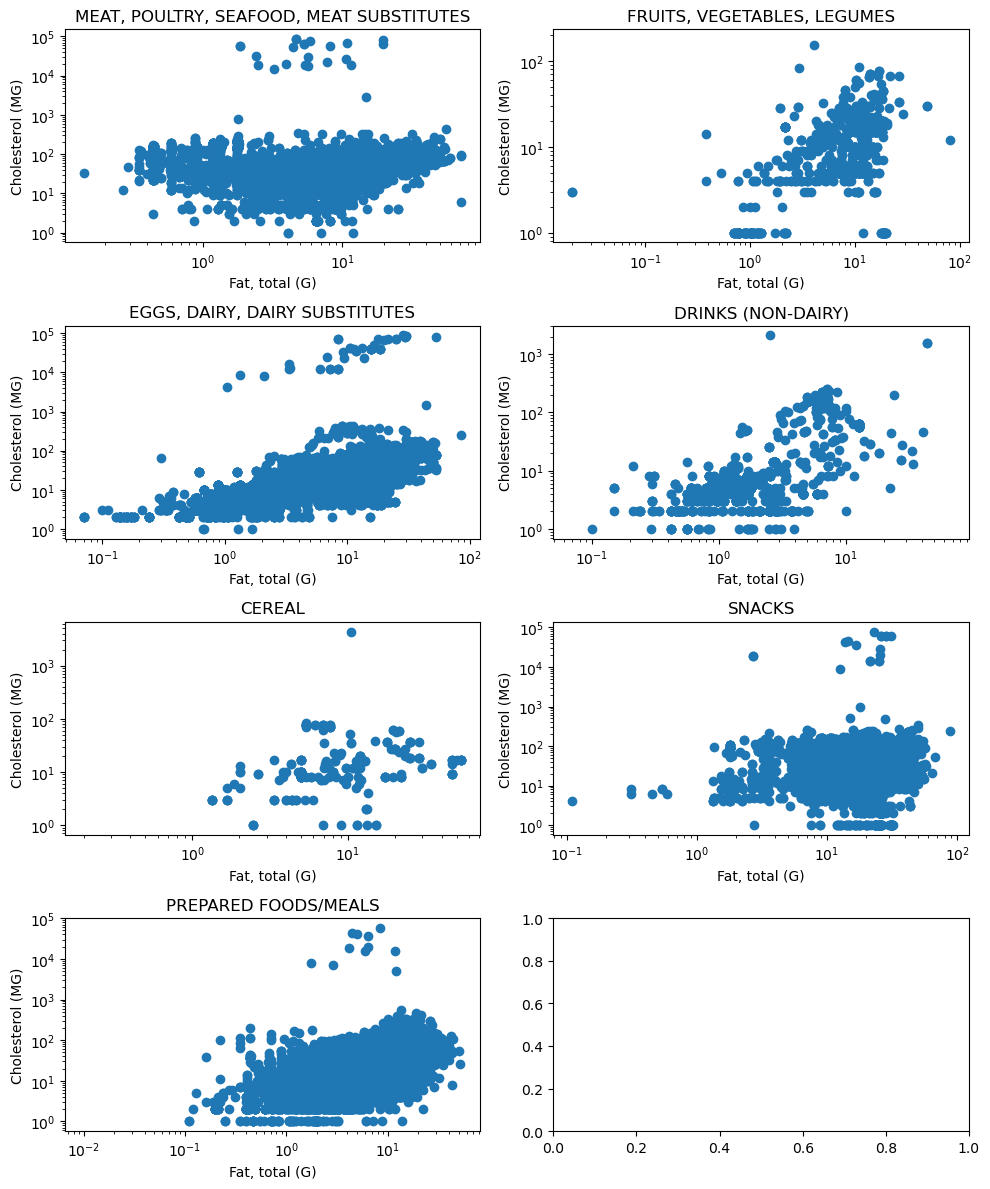

In [13]:
# plot cholesterol vs fat for 100g portion
fig, ax = plt.subplots(4, 2, figsize=(10,12))
axs = ax.ravel()

for i, cat in enumerate(categories):
    catmask = brand_food_nutrients['category'] == cat
    x = brand_food_nutrients.loc[catmask, 'Fat, total (G)']
    y = brand_food_nutrients.loc[catmask, 'Cholesterol (MG)']

    axs[i].plot(x, y, 'o')
    axs[i].set_title(f'{cat}')
    axs[i].set_xlabel('Fat, total (G)')
    axs[i].set_ylabel('Cholesterol (MG)')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    
fig.tight_layout()

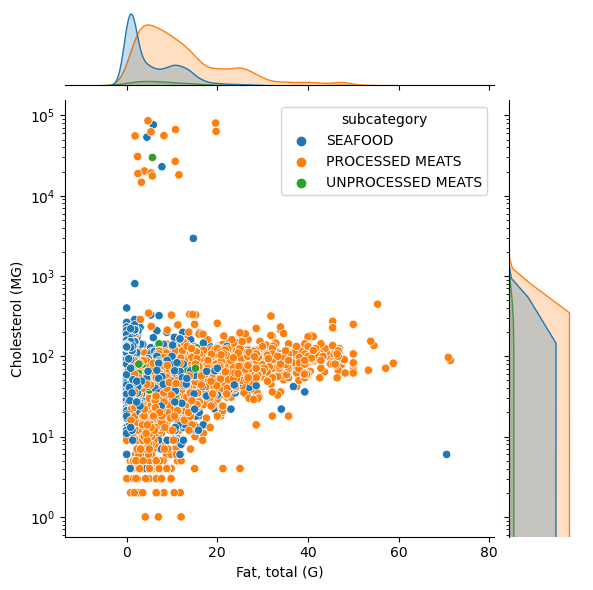

In [14]:
# MEAT, POULTRY, SEAFOOD, MEAT SUBSTITUTES: Cholesterol vs. Fat for 100g portion
subset = brand_food_nutrients['category'] == 'MEAT, POULTRY, SEAFOOD, MEAT SUBSTITUTES'
sns.jointplot(data=brand_food_nutrients[subset], x='Fat, total (G)', y='Cholesterol (MG)', hue='subcategory')
# plt.xscale('log')
plt.yscale('log')

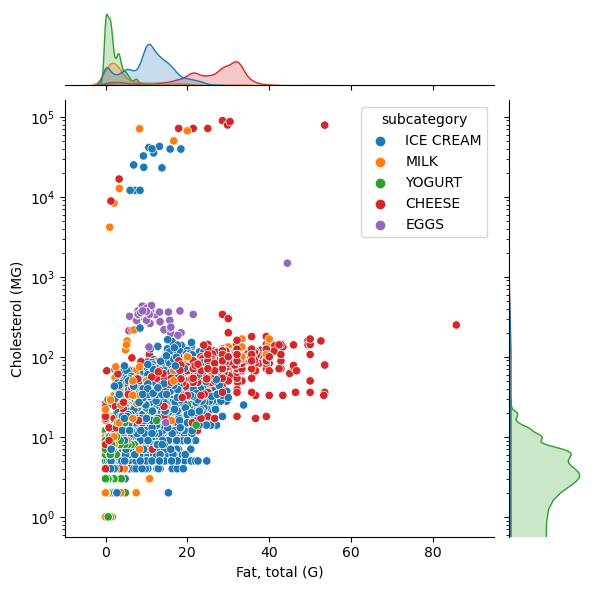

In [15]:
# EGGS, DAIRY, DAIRY SUBSTITUTES: Cholesterol vs. Fat for 100g portion
subset = brand_food_nutrients['category'] == 'EGGS, DAIRY, DAIRY SUBSTITUTES'
sns.jointplot(data=brand_food_nutrients[subset], x='Fat, total (G)', y='Cholesterol (MG)', hue='subcategory')
# plt.xscale('log')
plt.yscale('log')

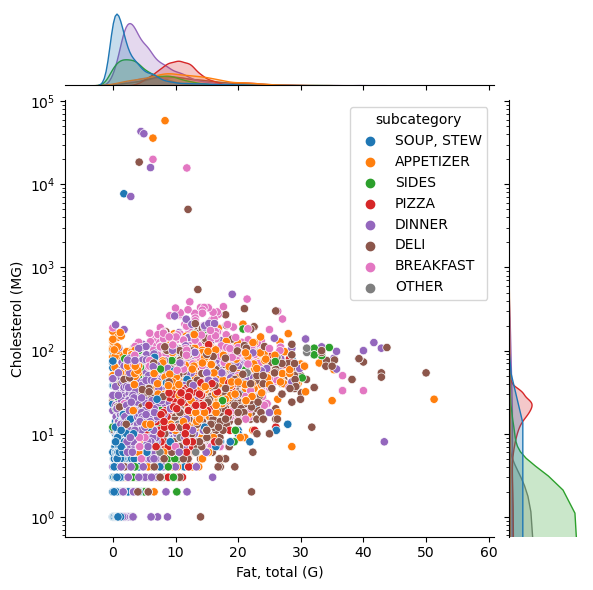

In [16]:
# PREPARED FOODS/MEALS: Cholesterol vs. Fat for 100g portion
subset = brand_food_nutrients['category'] == 'PREPARED FOODS/MEALS'
sns.jointplot(data=brand_food_nutrients[subset], x='Fat, total (G)', y='Cholesterol (MG)', hue='subcategory')
# plt.xscale('log')
plt.yscale('log')

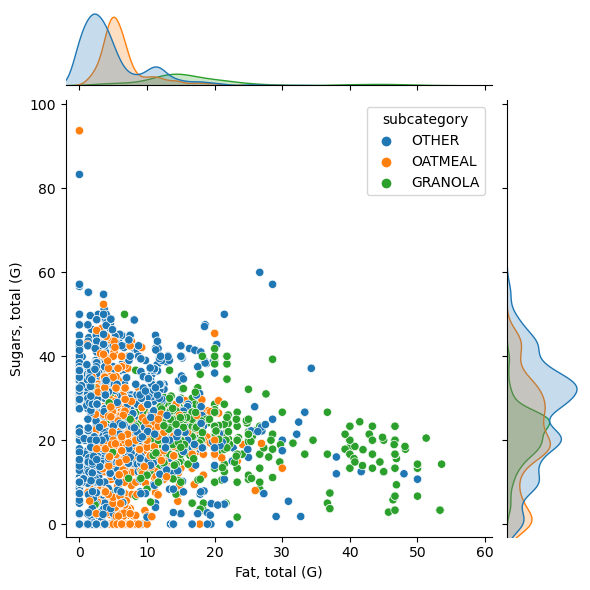

In [17]:
# CEREAL: Sugar vs. Fat for 100g portion
subset = brand_food_nutrients['category'] == 'CEREAL'
sns.jointplot(data=brand_food_nutrients[subset], x='Fat, total (G)', y='Sugars, total (G)', 
              hue='subcategory', xlim=(-2, 61), ylim=(-3,101))
# plt.xscale('log')
# plt.yscale('log')

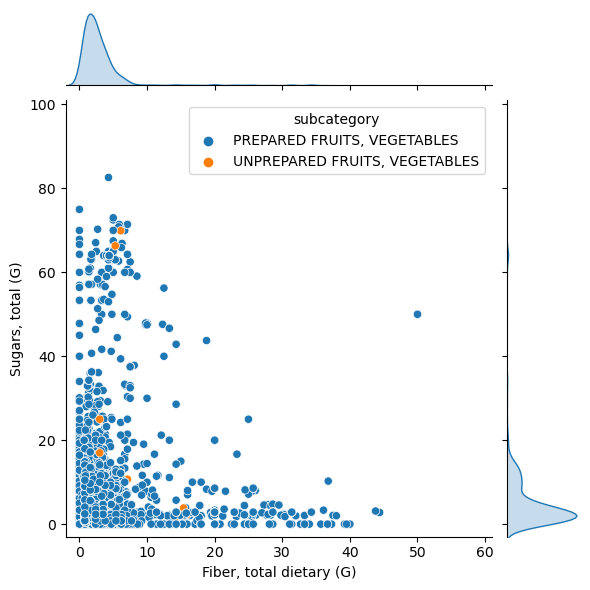

In [18]:
# FRUITS, VEGETABLES, LEGUMES: sugar vs. fiber for 100g portion
subset = brand_food_nutrients['category'] == 'FRUITS, VEGETABLES, LEGUMES'
sns.jointplot(data=brand_food_nutrients[subset], x='Fiber, total dietary (G)', y='Sugars, total (G)', 
              hue='subcategory', xlim=(-2, 61), ylim=(-3,101))
# plt.xscale('log')
# plt.yscale('log')

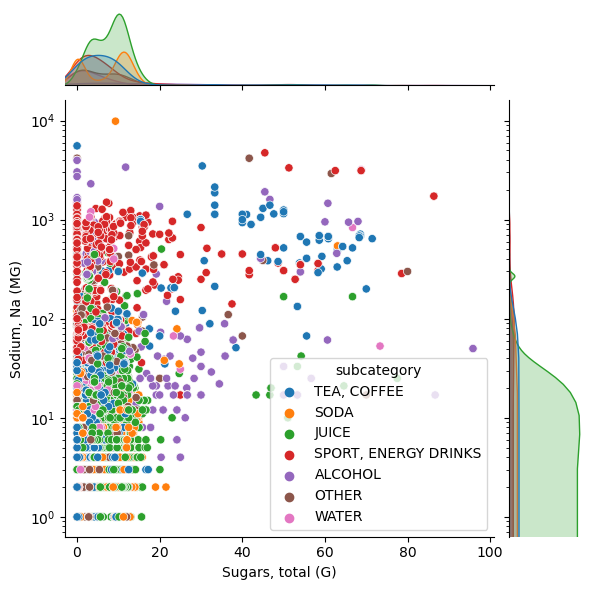

In [19]:
# DRINKS: sodium vs. sugar for 100g portion
subset = brand_food_nutrients['category'] == 'DRINKS (NON-DAIRY)'
# subset = brand_food_nutrients['category'] == 'CEREAL'
sns.jointplot(data=brand_food_nutrients[subset], x='Sugars, total (G)', y='Sodium, Na (MG)', 
              hue='subcategory', xlim=(-3, 101), ylim=None)
# plt.xscale('log')
plt.yscale('log')

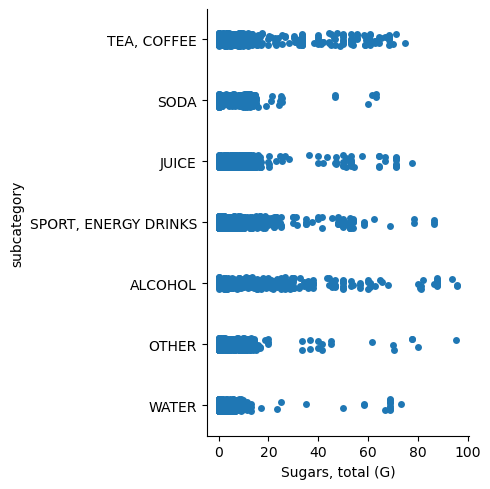

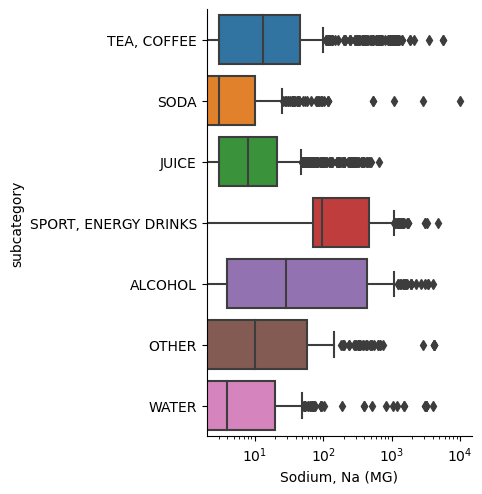

In [20]:
# alternate plots for sugar and sodium in drinks
subset = brand_food_nutrients['category'] == 'DRINKS (NON-DAIRY)'

sns.catplot(data=brand_food_nutrients[subset], x='Sugars, total (G)', y='subcategory')
# plt.xscale('log')
# plt.yscale('log')

sns.catplot(data=brand_food_nutrients[subset], x='Sodium, Na (MG)', y='subcategory', kind='box')
plt.xscale('log')
# plt.yscale('log')

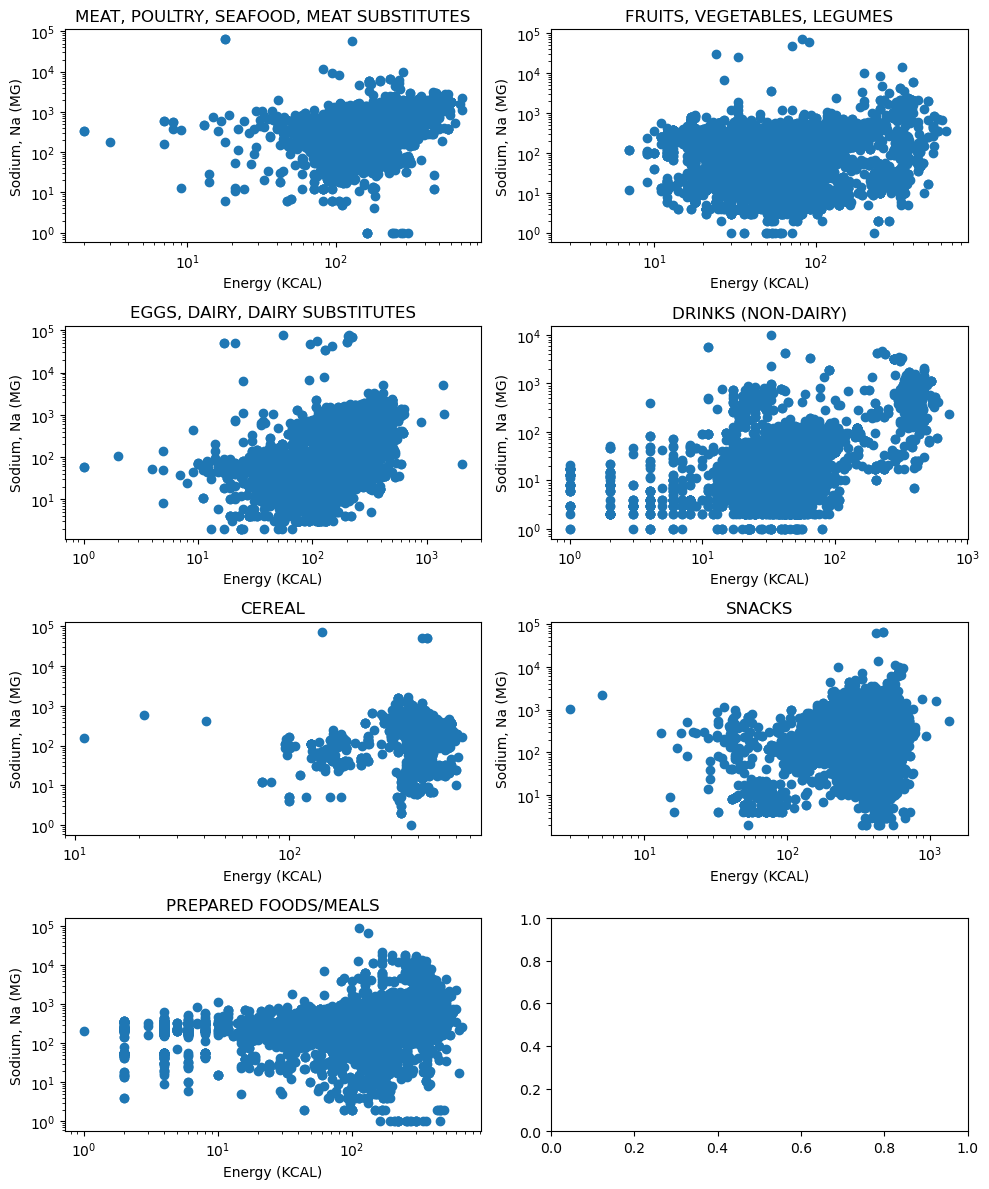

In [21]:
# plot sodium vs energy for 100g portion
fig, ax = plt.subplots(4, 2, figsize=(10,12))
axs = ax.ravel()

for i, cat in enumerate(categories):
    catmask = brand_food_nutrients['category'] == cat
    x = brand_food_nutrients.loc[catmask, 'Energy (KCAL)']
    y = brand_food_nutrients.loc[catmask, 'Sodium, Na (MG)']

    axs[i].plot(x, y, 'o')
    axs[i].set_title(f'{cat}')
    axs[i].set_xlabel('Energy (KCAL)')
    axs[i].set_ylabel('Sodium, Na (MG)')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    
fig.tight_layout()

In [22]:
brand_food_nutrients.to_csv('cleaned_brand_food_nutrients.csv', index=False)